In [38]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np

In [39]:
# 데이터 파일 경로
file_path = 'sensor_data_test.csv'

# 데이터 로드
sensor_data = pd.read_csv(file_path)

# 데이터 시각화

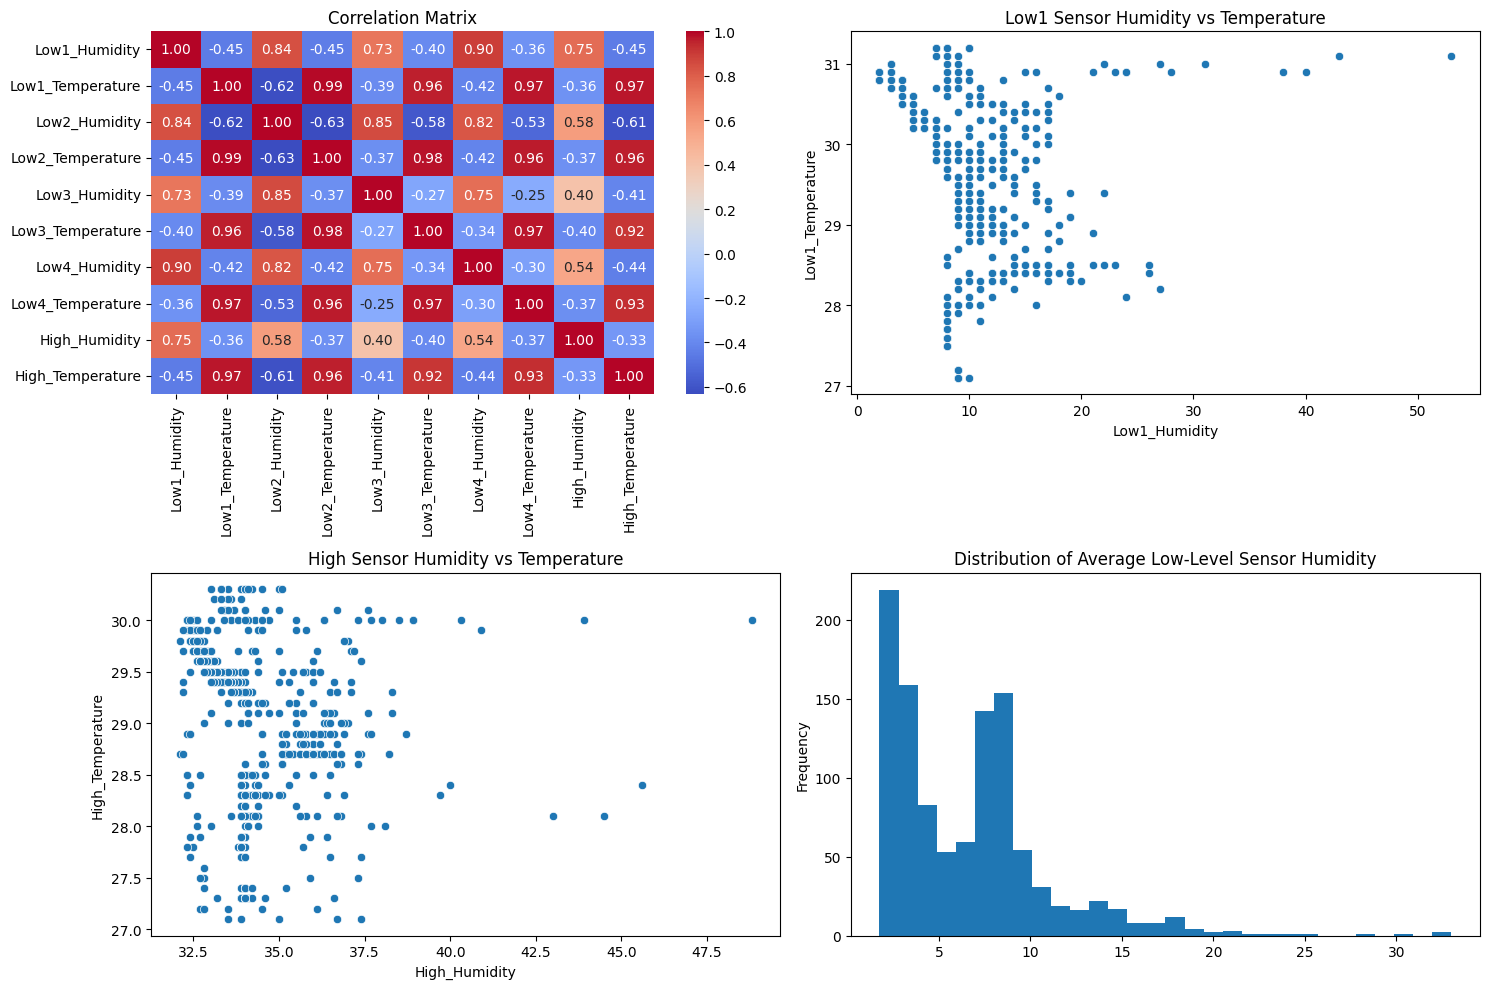

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 시각화를 위한 그래프 생성
plt.figure(figsize=(15, 10))
# 'Timestamp' 열 제외
sensor_data = sensor_data.select_dtypes(include=[np.number])

# 상관 관계 히트맵
plt.subplot(2, 2, 1)
sns.heatmap(sensor_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')

# Low1 센서의 습도와 온도
plt.subplot(2, 2, 2)
sns.scatterplot(x='Low1_Humidity', y='Low1_Temperature', data=sensor_data)
plt.title('Low1 Sensor Humidity vs Temperature')

# High 센서의 습도와 온도
plt.subplot(2, 2, 3)
sns.scatterplot(x='High_Humidity', y='High_Temperature', data=sensor_data)
plt.title('High Sensor Humidity vs Temperature')

# Low 센서들의 평균 습도 분포
plt.subplot(2, 2, 4)
sensor_data[['Low1_Humidity', 'Low2_Humidity', 'Low3_Humidity', 'Low4_Humidity']].mean(axis=1).plot(kind='hist', bins=30)
plt.title('Distribution of Average Low-Level Sensor Humidity')

plt.tight_layout()
plt.show()


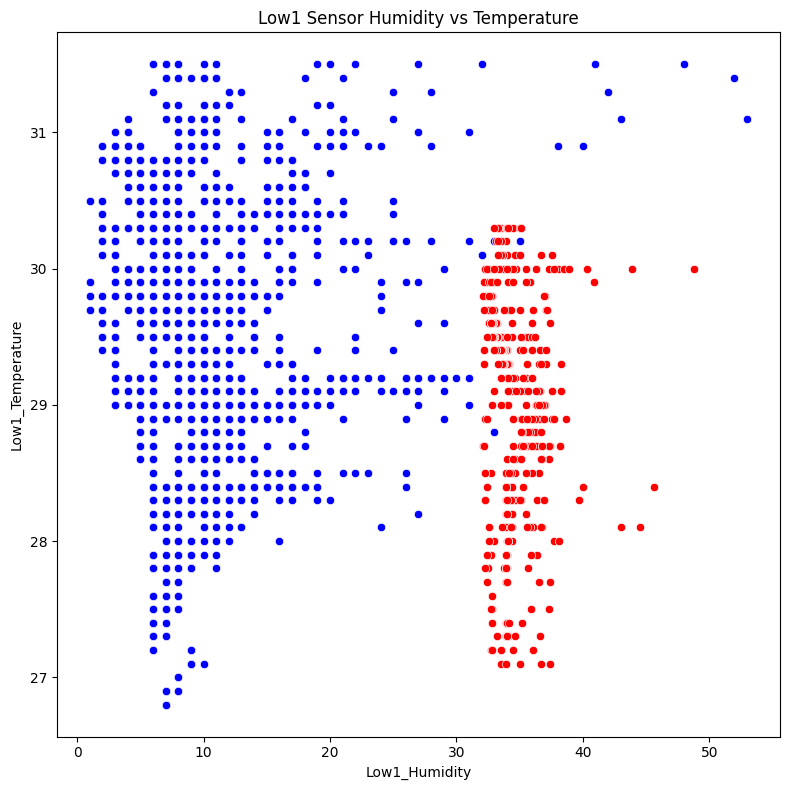

In [41]:
# 그래프 생성
plt.figure(figsize=(8, 8))

plt.title('Low1 Sensor Humidity vs Temperature')
sns.scatterplot(x='Low1_Humidity', y='Low1_Temperature', data=sensor_data,color='blue')
sns.scatterplot(x='Low2_Humidity', y='Low2_Temperature', data=sensor_data,color='blue')
sns.scatterplot(x='Low3_Humidity', y='Low3_Temperature', data=sensor_data,color='blue')
sns.scatterplot(x='Low4_Humidity', y='Low4_Temperature', data=sensor_data,color='blue')
sns.scatterplot(x='High_Humidity', y='High_Temperature', data=sensor_data,color='red')

plt.tight_layout()
plt.show()


In [42]:
# 입력 및 타겟 데이터 선택
X = sensor_data[['Low1_Humidity', 'Low1_Temperature', 'Low2_Humidity', 'Low2_Temperature', 'Low3_Humidity', 'Low3_Temperature', 'Low4_Humidity', 'Low4_Temperature']]
y = sensor_data[['High_Humidity', 'High_Temperature']]

# 데이터 분할: 훈련 세트와 테스트 세트
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 추가 데이터 분할: 훈련 세트를 다시 훈련 세트와 검증 세트로 분할
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 이렇게 하면 전체 데이터의 20%가 검증 세트가 됨

# 결과 확인
X_train.shape, X_val.shape, X_test.shape

((643, 8), (215, 8), (215, 8))

In [43]:
# 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2)  # High_Humidity와 High_Temperature에 대한 출력
])

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

In [44]:
# 모델 훈련 및 평가
history = model.fit(X_train, y_train, epochs=60, batch_size=32, validation_data=(X_val, y_val))

# 모델 평가
loss, mse = model.evaluate(X_test, y_test)
print(loss)
rmse = np.sqrt(mse)
print(f"Test MSE: {mse}, Test RMSE: {rmse}")

Epoch 1/60
21/21 [==============================] - 1s 7ms/step - loss: 137.5557 - mean_squared_error: 137.5557 - val_loss: 10.2762 - val_mean_squared_error: 10.2762
Epoch 2/60
21/21 [==============================] - 0s 2ms/step - loss: 7.9924 - mean_squared_error: 7.9924 - val_loss: 3.1118 - val_mean_squared_error: 3.1118
Epoch 3/60
21/21 [==============================] - 0s 2ms/step - loss: 2.3123 - mean_squared_error: 2.3123 - val_loss: 1.6435 - val_mean_squared_error: 1.6435
Epoch 4/60
21/21 [==============================] - 0s 2ms/step - loss: 1.7329 - mean_squared_error: 1.7329 - val_loss: 1.3715 - val_mean_squared_error: 1.3715
Epoch 5/60
21/21 [==============================] - 0s 2ms/step - loss: 1.4246 - mean_squared_error: 1.4246 - val_loss: 1.1460 - val_mean_squared_error: 1.1460
Epoch 6/60
21/21 [==============================] - 0s 2ms/step - loss: 1.2217 - mean_squared_error: 1.2217 - val_loss: 0.8610 - val_mean_squared_error: 0.8610
Epoch 7/60
21/21 [================

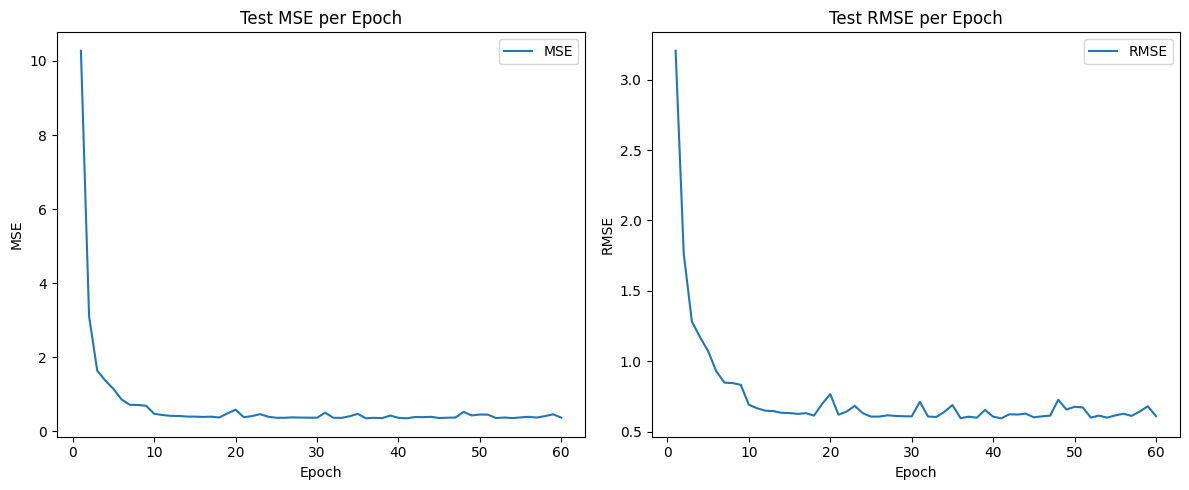

In [45]:

# 각 에포크에서의 MSE와 RMSE 추출
mse_per_epoch = history.history['val_mean_squared_error']
rmse_per_epoch = np.sqrt(mse_per_epoch)

# 에포크 숫자
epochs = range(1, len(mse_per_epoch) + 1)

# MSE 그래프
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, mse_per_epoch, '-', label='MSE')
plt.title('Test MSE per Epoch')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

# RMSE 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, rmse_per_epoch, '-', label='RMSE')
plt.title('Test RMSE per Epoch')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()
plt.show()

In [46]:
# 모델 저장
model.save('my_test_model.h5')

c:\Users\Acorn\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [51]:
file_path = 'sensor_data.csv'  # 새로운 데이터 파일 경로
new_data = pd.read_csv(file_path)

# 새로운 데이터에서 입력 데이터 선택
new_sensor_data = np.array([[10, 28.9, 6, 28.8, 6, 28.3, 9, 33]])

# 모델을 사용하여 예측 수행
predictions = model.predict(new_sensor_data)

# 예측 결과 출력
print("예측 결과:")
print(predictions)

1/1 [==============================] - 0s 17ms/step
예측 결과:
[[36.770023 30.012602]]


### tflite로 저장하는 코드

In [52]:
import tensorflow as tf

# 저장된 모델 불러오기
model = tf.keras.models.load_model('my_test_model.h5')

# TFLite Converter를 사용하여 모델을 TFLite 모델로 변환
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# TFLite 모델을 파일로 저장
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

print("모델이 TFLite 형식으로 저장되었습니다.")


OSError: No file or directory found at my_model.h5